# 1. Setup

In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading V-WSD Dataset

## Read dataframes

In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UR/NLE Seminar/code/data/preprocessed/train_df.csv',
                       index_col=0, sep='\t')
df['gold_image'] = pd.read_csv(
    '/content/drive/MyDrive/UR/NLE Seminar/code/data/raw/train.gold.v1.txt', header=None)[0]
df['phrase_preprocessed'] = df['target_preprocessed'] + ' ' + df['context_preprocessed']
df.head()

,target_word,phrase,target_preprocessed,context_preprocessed,img_0,img_1,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,non_eng,gold_image,phrase_preprocessed
0,moorhen,moorhen swamphen,moorhen,swamphen,image.3.jpg,image.8.jpg,image.4.jpg,image.1.jpg,image.2.jpg,image.0.jpg,image.5.jpg,image.6.jpg,image.7.jpg,image.9.jpg,0,image.0.jpg,moorhen swamphen
1,serinus,serinus genus,serinus,genus,image.3.jpg,image.23.jpg,image.4.jpg,image.1.jpg,image.2.jpg,image.20.jpg,image.5.jpg,image.24.jpg,image.22.jpg,image.21.jpg,0,image.20.jpg,serinus genus
2,pegmatite,pegmatite igneous,pegmatite,igneous,image.41.jpg,image.39.jpg,image.42.jpg,image.43.jpg,image.40.jpg,image.44.jpg,image.37.jpg,image.38.jpg,image.36.jpg,image.35.jpg,0,image.35.jpg,pegmatite igneous
3,bangalores,bangalores torpedo,bangalores,torpedo,image.58.jpg,image.59.jpg,image.64.jpg,image.57.jpg,image.55.jpg,image.56.jpg,image.62.jpg,image.63.jpg,image.61.jpg,image.60.jpg,0,image.55.jpg,bangalores torpedo
4,bonxie,bonxie skua,bonxie,skua,image.3.jpg,image.77.jpg,image.78.jpg,image.4.jpg,image.1.jpg,image.2.jpg,image.5.jpg,image.79.jpg,image.76.jpg,image.75.jpg,0,image.75.jpg,bonxie skua


## Wikipedia summaries

Read dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UR/NLE Seminar/Wiki summaries/Wikipedia summaries - DataFrame.csv')
df['phrase_preprocessed'] = df['target_preprocessed'] + ' ' + df['context_preprocessed']
df['gold_image'] = pd.read_csv(
    '/content/drive/MyDrive/UR/NLE Seminar/code/data/raw/train.gold.v1.txt', header=None)[0]
df.head()

,target_word,phrase,target_preprocessed,context_preprocessed,img_0,img_1,img_2,img_3,img_4,img_5,...,img_8,img_9,non_eng,summary_source,summary_phrase,summary_content,summary_link,notes,phrase_preprocessed,gold_image
0,moorhen,moorhen swamphen,moorhen,swamphen,image.3.jpg,image.8.jpg,image.4.jpg,image.1.jpg,image.2.jpg,image.0.jpg,...,image.7.jpg,image.9.jpg,0,target,Moorhen,Moorhens—sometimes called marsh hens—are mediu...,NaN,NaN,moorhen swamphen,image.0.jpg
1,serinus,serinus genus,serinus,genus,image.3.jpg,image.23.jpg,image.4.jpg,image.1.jpg,image.2.jpg,image.20.jpg,...,image.22.jpg,image.21.jpg,0,target,Serinus,Serinus is a genus of small birds in the finch...,NaN,NaN,serinus genus,image.20.jpg
2,pegmatite,pegmatite igneous,pegmatite,igneous,image.41.jpg,image.39.jpg,image.42.jpg,image.43.jpg,image.40.jpg,image.44.jpg,...,image.36.jpg,image.35.jpg,0,target,Pegmatite,A pegmatite is an igneous rock showing a very ...,NaN,NaN,pegmatite igneous,image.35.jpg
3,bangalores,bangalores torpedo,bangalores,torpedo,image.58.jpg,image.59.jpg,image.64.jpg,image.57.jpg,image.55.jpg,image.56.jpg,...,image.61.jpg,image.60.jpg,0,target,Bangalore torpedo,A Bangalore torpedo is an explosive charge pla...,NaN,NaN,bangalores torpedo,image.55.jpg
4,bonxie,bonxie skua,bonxie,skua,image.3.jpg,image.77.jpg,image.78.jpg,image.4.jpg,image.1.jpg,image.2.jpg,...,image.76.jpg,image.75.jpg,0,target,Great skua,"The great skua (Stercorarius skua), sometimes ...",NaN,NaN,bonxie skua,image.75.jpg


In [ ]:
df.isna().sum()

target_word                 0
phrase                      0
target_preprocessed         0
context_preprocessed        0
img_0                       0
img_1                       0
img_2                       0
img_3                       0
img_4                       0
img_5                       0
img_6                       0
img_7                       0
img_8                       0
img_9                       0
non_eng                     0
summary_source              0
summary_phrase              0
summary_content            19
summary_link            11615
notes                   12852
phrase_preprocessed         0
gold_image                  0
dtype: int64

Check out notes

In [ ]:
df[~df['notes'].isna()]

,target_word,phrase,target_preprocessed,context_preprocessed,img_0,img_1,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,non_eng,summary_source,summary_phrase,summary_content,summary_link,notes
384,palas,palas tree,palas,tree,image.3.jpg,image.5063.jpg,image.5064.jpg,image.984.jpg,image.4.jpg,image.1.jpg,image.2.jpg,image.5.jpg,image.319.jpg,image.5062.jpg,0,Andreas,Butea monosperma,Butea monosperma is a species of Butea native ...,https://en.wikipedia.org/wiki/Butea_monosperma,is it palash tree?
613,bacne,bacne acne,bacne,acne,image.786.jpg,image.997.jpg,image.7133.jpg,image.7138.jpg,image.7139.jpg,image.4540.jpg,image.7023.jpg,image.4524.jpg,image.1579.jpg,image.7140.jpg,0,Andreas,Acne,"Acne, also known as acne vulgaris, is a long-t...",https://en.wikipedia.org/wiki/Acne,Bacne = Acne on so.'s back
6954,western,western feature,western,feature,image.2883.jpg,image.1077.jpg,image.9349.jpg,image.3755.jpg,image.3385.jpg,image.2885.jpg,image.4474.jpg,image.2884.jpg,image.2882.jpg,image.2881.jpg,0,Kyuhee,western,in or from the west of a place,https://dictionary.cambridge.org/dictionary/en...,ambiguous meaning
7092,post,post install,post,install,image.2595.jpg,image.575.jpg,image.2846.jpg,image.14483.jpg,image.9637.jpg,image.12255.jpg,image.532.jpg,image.10097.jpg,image.1909.jpg,image.8765.jpg,0,Kyuhee,post,to affix to a usual place (such as a wall) for...,https://www.merriam-webster.com/dictionary/post,ambiguous meaning
7134,dig,dig excavate,dig,excavate,image.8431.jpg,image.2888.jpg,image.5998.jpg,image.4120.jpg,image.4130.jpg,image.5541.jpg,image.3165.jpg,image.5379.jpg,image.10395.jpg,image.6777.jpg,0,Kyuhee,Dig,the process of carefully removing soil and obj...,https://dictionary.cambridge.org/dictionary/en...,noun? verb?
7151,control,control manipulate,control,manipulate,image.4363.jpg,image.10389.jpg,image.3797.jpg,image.93.jpg,image.11194.jpg,image.757.jpg,image.3676.jpg,image.6323.jpg,image.10273.jpg,image.10766.jpg,0,Kyuhee,Control,"the act of controlling something or someone, o...",https://dictionary.cambridge.org/dictionary/en...,ambiguous meaning
7374,mademoiselle,mademoiselle drum,mademoiselle,drum,image.3.jpg,image.327.jpg,image.867.jpg,image.5441.jpg,image.4.jpg,image.1.jpg,image.2.jpg,image.5.jpg,image.7803.jpg,image.10805.jpg,0,Kyuhee,mademoiselle drum,Name of song or singer,https://en.wikipedia.org/wiki/Mademoiselle,No exact search results found
8603,ride,ride move,ride,move,image.3769.jpg,image.13384.jpg,image.8547.jpg,image.12161.jpg,image.5253.jpg,image.1148.jpg,image.5386.jpg,image.8196.jpg,image.6683.jpg,image.14354.jpg,0,Kyuhee,ride,"to sit on something such as a bicycle, motorbi...",https://dictionary.cambridge.org/dictionary/en...,same as nr. 8548
9180,blow,blow excite,blow,excite,image.9503.jpg,image.345.jpg,image.11052.jpg,image.14822.jpg,image.13402.jpg,image.9903.jpg,image.733.jpg,image.10092.jpg,image.6616.jpg,image.10725.jpg,0,Kyuhee,blow,"to cause something to be destroyed by a bomb, ...",https://dictionary.cambridge.org/dictionary/en...,ambiguous meaning
9209,blow,blow displace,blow,displace,image.2493.jpg,image.12684.jpg,image.11179.jpg,image.12430.jpg,image.11704.jpg,image.5411.jpg,image.4213.jpg,image.8591.jpg,image.10445.jpg,image.6990.jpg,0,Kyuhee,blow,to send forth a current of air or other gas,https://www.merriam-webster.com/dictionary/blow,ambiguous meaning


Remove rows with missing summaries (for now)

In [ ]:
df[df['summary_content'].isna()]

,target_word,phrase,target_preprocessed,context_preprocessed,img_0,img_1,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,non_eng,summary_source,summary_phrase,summary_content,summary_link,notes
977,surprise,surprise amazement,surprise,amazement,image.5183.jpg,image.1361.jpg,image.9121.jpg,image.2736.jpg,image.2739.jpg,image.9523.jpg,image.2738.jpg,image.2737.jpg,image.8659.jpg,image.2803.jpg,0,context,Amazement,NaN,NaN,NaN
1324,deparia,deparia genus,deparia,genus,image.3.jpg,image.2990.jpg,image.4.jpg,image.9332.jpg,image.1.jpg,image.2.jpg,image.3412.jpg,image.2159.jpg,image.5.jpg,image.11143.jpg,0,target,Deparia petersenii,NaN,NaN,NaN
1479,hirsutism,hirsutism hairiness,hirsutism,hairiness,image.786.jpg,image.1743.jpg,image.865.jpg,image.1811.jpg,image.1649.jpg,image.11713.jpg,image.1151.jpg,image.11711.jpg,image.3021.jpg,image.11712.jpg,0,target,Hirsutism,NaN,NaN,NaN
1512,buxus,buxus genus,buxus,genus,image.3.jpg,image.7401.jpg,image.4.jpg,image.11361.jpg,image.1.jpg,image.2.jpg,image.5917.jpg,image.11823.jpg,image.8050.jpg,image.5.jpg,0,target,Buxus,NaN,NaN,NaN
1652,pterygium,pterygium conjunctiva,pterygium,conjunctiva,image.1684.jpg,image.550.jpg,image.5517.jpg,image.786.jpg,image.11258.jpg,image.7082.jpg,image.5665.jpg,image.7001.jpg,image.12237.jpg,image.8568.jpg,0,target,Pterygium,NaN,NaN,NaN
1918,disgust,disgust dislike,disgust,dislike,image.639.jpg,image.2348.jpg,image.1361.jpg,image.12894.jpg,image.2995.jpg,image.2736.jpg,image.2739.jpg,image.2154.jpg,image.2738.jpg,image.2737.jpg,0,context,Dislike,NaN,NaN,NaN
2074,pamper,pamper treat,pamper,treat,image.1474.jpg,image.1475.jpg,image.404.jpg,image.1692.jpg,image.1478.jpg,image.10000.jpg,image.1477.jpg,image.1476.jpg,image.13238.jpg,image.790.jpg,0,target,Pamper,NaN,NaN,NaN
3650,chain-letter,chain-letter letter,chain-letter,letter,image.10237.jpg,image.13407.jpg,image.7065.jpg,image.4159.jpg,image.11541.jpg,image.9722.jpg,image.8441.jpg,image.11542.jpg,image.7344.jpg,image.14791.jpg,0,context,Letter,NaN,NaN,NaN
6892,contempt,contempt dislike,contempt,dislike,image.1474.jpg,image.9120.jpg,image.1475.jpg,image.5376.jpg,image.7375.jpg,image.1478.jpg,image.12796.jpg,image.1477.jpg,image.1476.jpg,image.12926.jpg,0,context,Dislike,NaN,NaN,NaN
6926,serve,serve provide,serve,provide,image.4703.jpg,image.14254.jpg,image.11878.jpg,image.13282.jpg,image.6610.jpg,image.8268.jpg,image.11182.jpg,image.3095.jpg,image.2376.jpg,image.7431.jpg,0,context,Provide,NaN,NaN,NaN


In [ ]:
df = df[~df['summary_content'].isna()]
df.shape

(12850, 22)

Create text input column: preprocessed phrase + summary

In [ ]:
df['text_input'] = df['phrase_preprocessed'] + ' ' + df['summary_content']

## Create positive and negative examples

In [ ]:
train_df = []
img_cols = ['img_' + str(i) for i in range(10)]

for ind, row in df.iterrows():
  for col in img_cols:
    label = 1 if row[col] == row['gold_image'] else 0
    train_df.append((row['phrase_preprocessed'], row[col], label))
    # train_df.append((row['text_input'], row[col], label))

train_df = pd.DataFrame(train_df, columns=['text', 'image', 'label'])
# train_df['image'] = train_df['image'].apply(lambda x: int(x.split('.')[1]))

train_df.head()

,text,image,label
0,moorhen swamphen,image.3.jpg,0
1,moorhen swamphen,image.8.jpg,0
2,moorhen swamphen,image.4.jpg,0
3,moorhen swamphen,image.1.jpg,0
4,moorhen swamphen,image.2.jpg,0


In [ ]:
train_df.shape

(128690, 3)

In [ ]:
train_df.duplicated().sum()

68

In [ ]:
train_df = train_df.drop_duplicates().reset_index().drop('index', axis=1)
train_df.shape

(128622, 3)

In [ ]:
train_df['label'].value_counts()

0    115753
1     12869
Name: label, dtype: int64

There's 10 times more negative than positive examples. To balance that out, we'll randomly sample 13000 of the negative examples and only use them 

In [ ]:
# how many negative examples to use
neg_frac = int(train_df[train_df['label'] == 1].shape[0] * 1.5)

train_df_neg = train_df[train_df['label'] == 0]
train_df_neg = train_df_neg.sample(neg_frac)
train_df_neg.shape

(19303, 3)

In [ ]:
train_df = pd.concat([train_df_neg, train_df[train_df['label'] == 1]])
train_df['label'].value_counts()

0    19303
1    12869
Name: label, dtype: int64

Shuffle rows

In [ ]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df.head()

,text,image,label
0,rock-wallaby wallaby,image.2916.jpg,1
1,sing utter,image.6618.jpg,0
2,bear-lithia water,image.10316.jpg,1
3,yo-yo toy,image.5622.jpg,1
4,choke coil,image.293.jpg,0


## Train & val split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_df = train_df.head(6000)
train_df, val_df = train_test_split(train_df, test_size=0.3)
train_df.shape, val_df.shape

((22520, 3), (9652, 3))

In [ ]:
train_df.to_csv('/content/drive/MyDrive/UR/NLE Seminar/code/train_val_split/train_df_neg_1_5.csv')
val_df.to_csv('/content/drive/MyDrive/UR/NLE Seminar/code/train_val_split/val_df_neg_1_5.csv')

Read old split from disk

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/UR/NLE Seminar/code/train_val_split/train_df_neg_1_5.csv', 
                     index_col=0)
train_df.head()

,text,image,label
25651,commelina flower,image.1480.jpg,1
31403,bust sculpture,image.723.jpg,0
26176,eptesicus genus,image.7364.jpg,1
12780,zoophilia paraphilia,image.3836.jpg,0
2497,thyroidectomy ablation,image.3851.jpg,1


In [ ]:
train_df.shape

(22520, 3)

In [ ]:
# train_df = train_df.head(train_df.shape[0] // 2)
train_df = train_df.tail(train_df.shape[0] - train_df.shape[0] // 2)

In [ ]:
train_df.shape

(11260, 3)

In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/UR/NLE Seminar/code/train_val_split/val_df.csv', 
                     index_col=0)
# val_df = val_df.head(1000)
val_df.head()

,phrase,image,label
23098,cornu structure,image.4130.jpg,0
6134,jimsonweed apple,image.5.jpg,0
20549,europol police,image.170.jpg,0
2442,eggcup crockery,image.1197.jpg,1
18130,phyllodoce genus,image.5.jpg,0


In [ ]:
val_df.shape

(7761, 3)

# Text tokenization


In [12]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

## Max document length

In [ ]:
texts = train_df['text'].to_list()

In [ ]:
tokens_lens = []

for t in tqdm(texts):
    input_ids = tokenizer.encode(t, add_special_tokens=True)
    tokens_lens.append(len(input_ids))

max(tokens_lens)

In [ ]:
tokens_lens = pd.Series(tokens_lens)

In [ ]:
import seaborn as sns

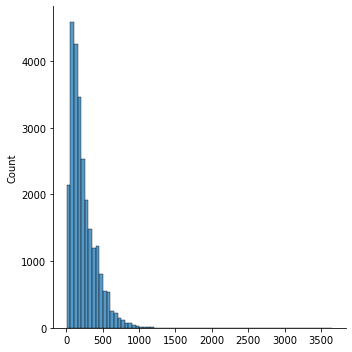

In [ ]:
sns.displot(tokens_lens, binwidth=50);

* just phrases: setting `max_length` to 20
* with summaries: to 512


## Bert encoding function

In [13]:
from tqdm import tqdm

In [14]:
def bert_encode(texts, max_length=512):
  input_ids = []
  attention_masks = []
  token_type_ids = []

  for text in tqdm(texts):
      encoded_dict = tokenizer.encode_plus(
                          text,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = max_length,           # Pad & truncate all sentences.
                          padding = 'max_length',
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                          truncation=True
                    )
      
      input_ids.append(encoded_dict['input_ids'])
      attention_masks.append(encoded_dict['attention_mask'])
      token_type_ids.append(encoded_dict['token_type_ids'])

  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  token_type_ids = torch.cat(token_type_ids, dim=0)

  return input_ids, attention_masks, token_type_ids

## Encode training data

In [ ]:
train_input = bert_encode(train_df['text'].to_list(), max_length=200)
train_input = {'input_ids': train_input[0], 
               'attention_masks': train_input[1], 
               'token_type_ids': train_input[2],
               'sentence_image_labels': torch.tensor(train_df['label'].to_list())}

100%|██████████| 11260/11260 [00:03<00:00, 3445.32it/s]


Add image filename lists

In [ ]:
train_input.update({'img_filenames': train_df['image'].to_list()})

# Datasets & dataloders

## Streaming dataset class

To load visual embeddings directly from files during training (otherwise RAM runs out almost immediately)

In [ ]:
from torch.utils.data import IterableDataset
from torch.utils.data import DataLoader
from itertools import cycle, islice, chain

In [ ]:
class VWSDDataset(IterableDataset):
  def __init__(self, data_input, vis_emb_dir):
    self.data_input = data_input
    self.data_size = data_input['input_ids'].shape[0]
    self.vis_emb_dir = vis_emb_dir

  def parse_vis_emb_file(self, file_path):
    vis_emb = pd.read_csv(file_path, index_col=0)
    vis_emb = torch.tensor(vis_emb.to_numpy()).float()
    return vis_emb

  def get_vis_emb_filename(self, filename):
    filename = filename.split('.jpg')[0]
    filename = f'{self.vis_emb_dir}{filename}_visual_emb.csv'
    return filename

  def process_data(self):
    for ind in range(self.data_size):
      this_input_ids = self.data_input['input_ids'][ind].detach()
      this_attention_mask = self.data_input['attention_masks'][ind].detach()
      this_token_type_ids = self.data_input['token_type_ids'][ind].detach()
      this_sentence_image_labels = self.data_input['sentence_image_labels'][ind].detach()

      vis_emb_filename = self.get_vis_emb_filename(self.data_input['img_filenames'][ind])
      visual_emb = self.parse_vis_emb_file(vis_emb_filename)
      visual_attention_mask = torch.ones(visual_emb.shape[:-1], dtype=torch.long)
      visual_token_type_ids = torch.ones(visual_emb.shape[:-1], dtype=torch.long)

      yield this_input_ids, this_attention_mask, this_token_type_ids, \
        visual_emb, visual_attention_mask, visual_token_type_ids, \
        this_sentence_image_labels

  def __iter__(self):
    return cycle(self.process_data())

  def __len__(self):
    return self.data_size

## Initialize datasets & dataloaders

In [ ]:
vis_emb_dir = '/content/drive/MyDrive/UR/NLE Seminar/code/visual_embeddings/visual_embeddings_train/'
batch_size = 16  # recommended 16 or 32

train_dataset = VWSDDataset(train_input, vis_emb_dir=vis_emb_dir)
train_dataloader = DataLoader(
            train_dataset,  
            batch_size = batch_size
        )

# Training

## Load BERT

In [ ]:
from transformers import VisualBertForPreTraining, BertConfig
from torch.optim import AdamW

In [ ]:
model = VisualBertForPreTraining.from_pretrained(
    "uclanlp/visualbert-nlvr2-coco-pre", 
    num_labels = 2, # The number of output labels--2 for binary classification.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.to(device);

Or load pretrained model from disk

In [ ]:
dir_path = '/content/drive/MyDrive/UR/NLE Seminar/code/models/visual_bert_8/'

model = VisualBertForPreTraining.from_pretrained(dir_path)
model.to(device);

## Optimizer & Learning Rate Scheduler

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 1

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

## Training Loop

Helper function for formatting elapsed times as `hh:mm:ss`


In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


Clear up RAM

In [ ]:
# del df
del train_df
del tokenizer
del train_input
# del train_df_neg
# del val_df

Training




In [ ]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(islice(train_dataloader, len(train_dataloader))):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_attention_mask = batch[1].to(device)
        b_token_type_ids = batch[2].to(device)
        b_visual_emb = batch[3].to(device)
        b_visual_attention_mask = batch[4].to(device)
        b_visual_token_type_ids = batch[5].to(device)
        b_labels = torch.ones((batch_size, 
                               b_attention_mask.size(-1) + b_visual_attention_mask.size(-1)), 
                              dtype=torch.long).to(device)
        b_sentence_image_labels = batch[6].to(device)

        model.zero_grad()        

        result = model(input_ids=b_input_ids, 
                       token_type_ids=b_token_type_ids, 
                       attention_mask=b_attention_mask, 
                       visual_embeds=b_visual_emb, 
                       visual_attention_mask=b_visual_attention_mask, 
                       visual_token_type_ids=b_visual_token_type_ids,
                       labels=b_labels,
                       sentence_image_labels=b_sentence_image_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.prediction_logits
        total_train_loss += loss.item()

        del result
        del b_input_ids
        del b_attention_mask
        del b_token_type_ids
        del b_visual_emb
        del b_visual_attention_mask
        del b_visual_token_type_ids
        del b_labels
        del batch

        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    training_time = format_time(time.time() - t0)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 1 ========
Training...
  Batch    40  of    704.    Elapsed: 0:03:23.
  Batch    80  of    704.    Elapsed: 0:06:22.
  Batch   120  of    704.    Elapsed: 0:09:19.
  Batch   160  of    704.    Elapsed: 0:12:08.
  Batch   200  of    704.    Elapsed: 0:14:55.
  Batch   240  of    704.    Elapsed: 0:17:41.
  Batch   280  of    704.    Elapsed: 0:20:23.
  Batch   320  of    704.    Elapsed: 0:23:04.
  Batch   360  of    704.    Elapsed: 0:25:39.
  Batch   400  of    704.    Elapsed: 0:28:13.
  Batch   440  of    704.    Elapsed: 0:30:51.
  Batch   480  of    704.    Elapsed: 0:33:24.
  Batch   520  of    704.    Elapsed: 0:36:02.
  Batch   560  of    704.    Elapsed: 0:38:30.
  Batch   600  of    704.    Elapsed: 0:41:03.
  Batch   640  of    704.    Elapsed: 0:43:33.
  Batch   680  of    704.    Elapsed: 0:46:03.

  Average training loss: 0.51
  Training epoch took: 0:47:30

Training complete!
Total training took 0:47:30 (h:mm:ss)


## Save model

In [ ]:
import os
dir_path = '/content/drive/MyDrive/UR/NLE Seminar/code/models/visual_bert_8/'
# os.makedirs(dir_path)
model.save_pretrained(dir_path)

In [ ]:
tokenizer.save_pretrained(dir_path)

In [ ]:
dir_path = '/content/drive/MyDrive/UR/NLE Seminar/code/train_val_split/'
# os.makedirs(dir_path)
train_df.to_csv(dir_path + 'train_df_summ.csv')
val_df.to_csv(dir_path + 'val_df_summ.csv')

# Validation

## Validation plain phrases

In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/UR/NLE Seminar/code/train_val_split/val_df.csv', 
                     index_col=0)
val_df.head()

,phrase,image,label
23098,cornu structure,image.4130.jpg,0
6134,jimsonweed apple,image.5.jpg,0
20549,europol police,image.170.jpg,0
2442,eggcup crockery,image.1197.jpg,1
18130,phyllodoce genus,image.5.jpg,0


In [ ]:
val_df.shape

(7761, 3)

In [ ]:
val_input = bert_encode(val_df['phrase'].to_list())
val_input = {'input_ids': val_input[0], 
             'attention_masks': val_input[1], 
             'token_type_ids': val_input[2],
             'sentence_image_labels': torch.tensor(val_df['label'].to_list())}
val_input.update({'img_filenames': val_df['image'].to_list()})

100%|██████████| 7761/7761 [00:06<00:00, 1280.96it/s]


In [ ]:
vis_emb_dir = '/content/drive/MyDrive/UR/NLE Seminar/code/visual_embeddings/visual_embeddings_train/'
batch_size = 64  # recommended 16 or 32

val_dataset = VWSDDataset(val_input, vis_emb_dir=vis_emb_dir)
validation_dataloader = DataLoader(
            val_dataset,
            # sampler = SequentialSampler(val_dataset),
            batch_size = batch_size
        )

In [ ]:
dir_path = '/content/drive/MyDrive/UR/NLE Seminar/code/models/visual_bert_5/'

model = VisualBertForPreTraining.from_pretrained(dir_path)
# tokenizer = BertTokenizer.from_pretrained(dir_path)

model.to(device);

In [ ]:
del val_df
del tokenizer

In [ ]:
model.eval()

predictions, true_labels = [], []

for batch in tqdm(islice(validation_dataloader, len(validation_dataloader)), 
                  total=len(validation_dataloader)):
  batch = tuple(t.to(device) for t in batch)
  
  b_input_ids = batch[0].to(device)
  b_attention_mask = batch[1].to(device)
  b_token_type_ids = batch[2].to(device)
  b_visual_emb = batch[3].to(device)
  b_visual_attention_mask = batch[4].to(device)
  b_visual_token_type_ids = batch[5].to(device)
  b_labels = torch.ones((batch_size, 
                         b_attention_mask.size(-1) + b_visual_attention_mask.size(-1)), 
                         dtype=torch.long).to(device)
  b_sentence_image_labels = batch[6].to(device)

  with torch.no_grad():
    result = model(input_ids=b_input_ids, 
                       token_type_ids=b_token_type_ids, 
                       attention_mask=b_attention_mask, 
                       visual_embeds=b_visual_emb, 
                       visual_attention_mask=b_visual_attention_mask, 
                       visual_token_type_ids=b_visual_token_type_ids,
                       labels=b_labels,
                       sentence_image_labels=b_sentence_image_labels,
                       return_dict=True)

    logits = result.seq_relationship_logits
    logits = logits.detach().cpu().numpy()
    # print('logits:', logits.shape, logits)
    label_ids = b_sentence_image_labels.to('cpu').numpy()
    # print('label_ids:', label_ids.shape, label_ids)
    
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

    del result
    del b_input_ids
    del b_attention_mask
    del b_token_type_ids
    del b_visual_emb
    del b_visual_attention_mask
    del b_visual_token_type_ids
    del b_labels
    del batch

  # break

100%|██████████| 122/122 [32:47<00:00, 16.13s/it]


In [ ]:
import numpy as np

In [ ]:
predictions = np.array(predictions)
predictions.shape

(122, 64, 2)

In [ ]:
predictions = predictions.reshape(predictions.shape[0] * 64, 2)
predictions.shape

(7808, 2)

In [ ]:
true_labels = np.array(true_labels)
true_labels = true_labels.reshape(true_labels.shape[0] * 64)
true_labels.shape

(7808,)

In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['pred_true', 'pred_false'])
predictions_df['real_label'] = pd.Series(true_labels)
predictions_df.head()

,pred_true,pred_false,real_label
0,-0.330886,0.442226,0
1,3.431724,-4.862715,0
2,2.611861,-4.051740,0
3,-0.073379,0.041858,1
4,3.395190,-4.895686,0


In [ ]:
predictions_df.isna().sum()

pred_true     0
pred_false    0
real_label    0
dtype: int64

In [ ]:
import os
os.mkdir('/content/drive/MyDrive/UR/NLE Seminar/code/predictions/visual_bert_5/')
predictions_df.to_csv(
    '/content/drive/MyDrive/UR/NLE Seminar/code/predictions/visual_bert_5/validation.csv'
    )

In [ ]:
predictions_df = pd.read_csv(
    '/content/drive/MyDrive/UR/NLE Seminar/code/predictions/visual_bert_5/validation.csv', index_col=0)

In [ ]:
predictions_df['pred_label'] = predictions_df.apply(
    lambda row: 1 if row['pred_true'] > row['pred_false'] else 0,  
    # lambda row: 1 if row['pred_true'] > 0.5 else 0,
    # lambda row: 1 if row['pred_true'] - row['pred_false'] > 0.3 else 0,
    axis=1
)
predictions_df.head()

,pred_true,pred_false,real_label,pred_label
0,-0.330886,0.442226,0,0
1,3.431724,-4.862715,0,1
2,2.611861,-4.051740,0,1
3,-0.073379,0.041858,1,0
4,3.395190,-4.895686,0,1


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(classification_report(predictions_df['pred_label'], predictions_df['real_label']))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40      5204
           1       0.13      0.19      0.15      2604

    accuracy                           0.30      7808
   macro avg       0.30      0.27      0.28      7808
weighted avg       0.35      0.30      0.32      7808



In [ ]:
accuracy_score(predictions_df['pred_label'], predictions_df['real_label'])

0.3241547131147541

## Validation summaries

In [ ]:
import pandas as pd

In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/UR/NLE Seminar/code/train_val_split/val_df_summ.csv', 
                     index_col=0)
val_df.head()

,text,image,label
4846,"agama agamid The common agama, red-headed rock...",image.13049.jpg,1
20727,albugo genus Albugo is a genus of plant-parasi...,image.9123.jpg,0
7811,accipitridae family The Accipitridae is one of...,image.3.jpg,0
23774,killifish cyprinodont A killifish is any of va...,image.696.jpg,1
21221,"emilia genus Genre (from French genre 'kind, ...",image.1612.jpg,0


In [ ]:
val_input = bert_encode(val_df['text'].to_list())
val_input = {'input_ids': val_input[0], 
             'attention_masks': val_input[1], 
             'token_type_ids': val_input[2],
             'sentence_image_labels': torch.tensor(val_df['label'].to_list())}
val_input.update({'img_filenames': val_df['image'].to_list()})

100%|██████████| 7710/7710 [01:27<00:00, 88.30it/s]


In [ ]:
from transformers import VisualBertForPreTraining

In [ ]:
dir_path = '/content/drive/MyDrive/UR/NLE Seminar/code/models/visual_bert_7/'

model = VisualBertForPreTraining.from_pretrained(dir_path)
# tokenizer = BertTokenizer.from_pretrained(dir_path)

model.to(device);

In [ ]:
vis_emb_dir = '/content/drive/MyDrive/UR/NLE Seminar/code/visual_embeddings/visual_embeddings_train/'
batch_size = 16  # recommended 16 or 32

val_dataset = VWSDDataset(val_input, vis_emb_dir=vis_emb_dir)
validation_dataloader = DataLoader(
            val_dataset,
            batch_size = batch_size
        )

In [ ]:
model.eval()

predictions, true_labels = [], []

for batch in tqdm(islice(validation_dataloader, len(validation_dataloader)), 
                  total=len(validation_dataloader)):
  batch = tuple(t.to(device) for t in batch)
  
  b_input_ids = batch[0].to(device)
  b_attention_mask = batch[1].to(device)
  b_token_type_ids = batch[2].to(device)
  b_visual_emb = batch[3].to(device)
  b_visual_attention_mask = batch[4].to(device)
  b_visual_token_type_ids = batch[5].to(device)
  b_labels = torch.ones((batch_size, 
                         b_attention_mask.size(-1) + b_visual_attention_mask.size(-1)), 
                         dtype=torch.long).to(device)
  b_sentence_image_labels = batch[6].to(device)

  with torch.no_grad():
    result = model(input_ids=b_input_ids, 
                       token_type_ids=b_token_type_ids, 
                       attention_mask=b_attention_mask, 
                       visual_embeds=b_visual_emb, 
                       visual_attention_mask=b_visual_attention_mask, 
                       visual_token_type_ids=b_visual_token_type_ids,
                       labels=b_labels,
                       sentence_image_labels=b_sentence_image_labels,
                       return_dict=True)

    logits = result.seq_relationship_logits
    logits = logits.detach().cpu().numpy()
    # print('logits:', logits.shape, logits)
    label_ids = b_sentence_image_labels.to('cpu').numpy()
    # print('label_ids:', label_ids.shape, label_ids)
    
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

    del result
    del b_input_ids
    del b_attention_mask
    del b_token_type_ids
    del b_visual_emb
    del b_visual_attention_mask
    del b_visual_token_type_ids
    del b_labels
    del batch

  # break

100%|██████████| 482/482 [1:27:26<00:00, 10.88s/it]


In [ ]:
import numpy as np

In [ ]:
predictions = np.array(predictions)
predictions.shape

(482, 16, 2)

In [ ]:
predictions = predictions.reshape(predictions.shape[0] * batch_size, 2)
predictions.shape

(7712, 2)

In [ ]:
true_labels = np.array(true_labels)
true_labels = true_labels.reshape(true_labels.shape[0] * batch_size)
true_labels.shape

(7712,)

In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['pred_true', 'pred_false'])
predictions_df['real_label'] = pd.Series(true_labels)
predictions_df.head()

,pred_true,pred_false,real_label
0,-0.762195,0.617359,1
1,-0.807919,0.779342,0
2,2.952086,-4.558843,0
3,0.523355,-1.095356,1
4,1.386477,-2.630606,0


In [ ]:
predictions_df.isna().sum()

pred_true     0
pred_false    0
real_label    0
dtype: int64

In [ ]:
import os
os.mkdir('/content/drive/MyDrive/UR/NLE Seminar/code/predictions/visual_bert_7')
predictions_df.to_csv(
    '/content/drive/MyDrive/UR/NLE Seminar/code/predictions/visual_bert_7/validation.csv'
    )

In [ ]:
predictions_df['pred_label'] = predictions_df.apply(
    lambda row: 1 if row['pred_true'] > row['pred_false'] else 0,  
    # lambda row: 1 if row['pred_true'] > 0.5 else 0,
    # lambda row: 1 if row['pred_true'] - row['pred_false'] > 0.3 else 0,
    axis=1
)
predictions_df.head()

,pred_true,pred_false,real_label,pred_label
0,-0.762195,0.617359,1,0
1,-0.807919,0.779342,0,0
2,2.952086,-4.558843,0,1
3,0.523355,-1.095356,1,1
4,1.386477,-2.630606,0,1


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(classification_report(predictions_df['pred_label'], predictions_df['real_label']))

              precision    recall  f1-score   support

           0       0.22      0.21      0.21      4025
           1       0.18      0.19      0.19      3687

    accuracy                           0.20      7712
   macro avg       0.20      0.20      0.20      7712
weighted avg       0.20      0.20      0.20      7712



In [ ]:
accuracy_score(predictions_df['pred_label'], predictions_df['real_label'])

0.24572095435684646

# Testing

## Load test data

In [4]:
import pandas as pd

### English

In [18]:
lang = 'en'
# df = pd.read_csv(
    # '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/preprocessed/test_en.csv', 
    # sep='\t', index_col=0)
df = pd.read_csv(
    '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/preprocessed/test_en_with_summaries_full.csv',
    )
df.head()

,target_word,phrase,target_preprocessed,context_preprocessed,img_0,img_1,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,non_eng,summary_source,wiki_title,summary_content
0,goal,football goal,football,goal,image.4418.jpg,image.4416.jpg,image.4417.jpg,image.4413.jpg,image.4412.jpg,image.4415.jpg,image.4419.jpg,image.4414.jpg,image.2166.jpg,image.1150.jpg,0,target,Football,Football is a family of team sports that invol...
1,mustard,mustard seed,mustard,seed,image.4429.png,image.4422.jpg,image.4423.jpg,image.4424.jpg,image.4421.jpg,image.4427.jpg,image.4426.jpg,image.4420.jpg,image.4425.jpg,image.4428.jpg,0,https://en.wikipedia.org/wiki/Mustard_seed,NaN,Mustard seeds are the small round seeds of var...
2,seat,eating seat,eating,seat,image.4435.jpg,image.4436.jpg,image.1166.jpg,image.4430.jpg,image.4433.jpg,image.4432.jpg,image.4438.jpg,image.4434.jpg,image.4431.jpg,image.4437.jpg,0,Eating,NaN,Eating (also known as consuming) is the ingest...
3,navigate,navigate the web,navigate,the web,image.4439.jpg,image.4440.jpg,image.4441.jpg,image.4442.jpg,image.4444.jpg,image.4445.jpg,image.1435.jpg,image.4446.png,image.1434.jpg,image.4443.jpg,0,Navigation,NaN,Navigation is a field of study that focuses on...
4,butterball,butterball person,butterball,person,image.4454.jpg,image.4450.jpg,image.4455.jpg,image.4453.jpg,image.4448.jpg,image.1253.jpg,image.4451.jpg,image.4452.jpg,image.4447.jpg,image.4449.jpg,0,Butterball,NaN,Butterball is a brand of turkey and other poul...


In [ ]:
df.shape

(463, 15)

In [19]:
df.at[40, 'context_preprocessed'] = ''
df.at[367, 'context_preprocessed'] = ''

In [ ]:
# plain phrases
df['text_input'] = df['target_preprocessed'] + ' ' + df['context_preprocessed']

In [20]:
# summaries
df['text_input'] = df['target_preprocessed'] + ' ' \
  + df['context_preprocessed'] + ' ' + df['summary_content']

In [21]:
df.isna().sum()

target_word               0
phrase                    0
target_preprocessed       0
context_preprocessed      0
img_0                     0
img_1                     0
img_2                     0
img_3                     0
img_4                     0
img_5                     0
img_6                     0
img_7                     0
img_8                     0
img_9                     0
non_eng                   0
summary_source            0
wiki_title              347
summary_content           0
text_input                0
dtype: int64

### Farsi

In [5]:
lang = 'fa'
df = pd.read_csv(
    # '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/preprocessed/test_fa_translated.csv', index_col=0
    '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/preprocessed/test_fa_with_summaries_full.csv',
     )
df.head()

,target_word,phrase,img_0,img_1,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,target_eng,phrase_eng,summary_source,wiki_title,summary_content
0,برنج‎,فلز برنج,image.2732.jpg,image.2734.jpg,image.2727.jpg,image.2731.jpg,image.2735.jpg,image.2726.jpg,image.2729.jpg,image.2733.jpg,image.2730.jpg,image.2728.jpg,Rice,brass,target,Rice,"Ice is water frozen into a solid state, typica..."
1,ملخ,ملخ بادی,image.2743.jpg,image.2741.jpg,image.2740.jpg,image.921.jpg,image.2736.jpg,image.2744.jpg,image.2737.png,image.2742.jpg,image.2738.jpg,image.2739.jpg,Grasshopper,Wind locust,target,Grasshopper,Grasshoppers are a group of insects belonging ...
2,شام,سرزمین شام,image.2747.jpg,image.2749.jpg,image.2745.jpg,image.2753.jpg,image.2748.jpg,image.2754.jpg,image.2751.png,image.2746.jpg,image.2750.jpg,image.2752.jpg,the evening,The land of the evening,target,Evening,Eventing (also known as three day eventing or ...
3,عدسی,عدسی نور,image.2761.jpg,image.2300.jpg,image.2758.jpg,image.2762.jpg,image.2760.jpg,image.2756.jpg,image.2759.jpg,image.2755.jpg,image.2757.jpg,image.95.jpg,Lenses,Light lens,https://en.wikipedia.org/wiki/Lens_(vertebrate...,Lens (vertebrate anatomy),"The lens, or crystalline lens, is a transparen..."
4,توپ,توپ نظامی,image.2769.jpg,image.2766.jpg,image.2765.jpg,image.2763.jpg,image.2764.jpg,image.2770.jpg,image.2772.jpg,image.2767.jpg,image.2768.jpg,image.2771.png,Ball,Military ball,target,Ball,A bell is a directly struck idiophone percussi...


In [ ]:
!ls '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/preprocessed'

test_en.csv			 test_fa_with_summaries_full.csv
test_en_with_summaries.csv	 test_fa_with_summaries.gsheet
test_en_with_summaries_full.csv  test_it_translated.csv
test_en_with_summaries.gsheet	 test_it_with_summaries.csv
test_fa_translated.csv		 test_it_with_summaries_full.csv
test_fa_with_summaries.csv	 test_it_with_summaries.gsheet


In [ ]:
df.shape

(200, 15)

In [ ]:
# plain phrases
df['text_input'] = df['phrase_eng']

In [6]:
# summaries
df['summary_content'] = df['summary_content'].fillna('')
df['text_input'] = df['phrase_eng'] + ' ' + df['summary_content']

In [58]:
df.isna().sum()

target_word         0
phrase              0
img_0               0
img_1               0
img_2               0
img_3               0
img_4               0
img_5               0
img_6               0
img_7               0
img_8               0
img_9               0
target_eng          0
phrase_eng          0
summary_source      9
wiki_title         10
summary_content     0
text_input          0
dtype: int64

### Italian

In [35]:
lang = 'it'
df = pd.read_csv(
    # '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/preprocessed/test_it_translated.csv', index_col=0
    '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/preprocessed/test_it_with_summaries_full.csv',
     )
df.head()

,target_word,phrase,img_0,img_1,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,target_eng,phrase_eng,summary_source,wiki_title,summary_content
0,gomma,gomma per smacchiare,image.3.jpg,image.7.jpg,image.8.jpg,image.1.jpg,image.9.jpg,image.5.jpg,image.6.jpg,image.4.jpg,image.0.jpg,image.2.jpg,eraser,rubber to remove,phrase,Natural rubber,"In mathematics, the natural numbers are those ..."
1,asino,asino gioco di carte,image.18.jpg,image.17.jpg,image.11.jpg,image.10.jpg,image.15.jpg,image.16.png,image.14.jpg,image.12.jpg,image.13.jpg,image.19.jpg,donkey,donkey card game,target,Donkey,Monkey is a common name that may refer to most...
2,colonna,colonna missione,image.22.jpg,image.24.jpg,image.28.jpg,image.27.jpg,image.25.jpg,image.26.jpg,image.20.jpg,image.21.jpg,image.23.jpg,image.29.jpg,colonna,mission column,target,Colonna family,"The House of Colonna, also known as Sciarrillo..."
3,box,box per infanti,image.33.jpg,image.32.jpg,image.37.jpg,image.38.jpg,image.35.jpg,image.34.jpg,image.31.jpg,image.39.jpg,image.30.jpg,image.36.jpg,box,Box for infants,target,Box,A box (plural: boxes) is a container used for ...
4,bolla,bolla di misurazione,image.48.jpg,image.44.jpg,image.41.jpg,image.46.jpg,image.47.jpg,image.42.jpg,image.40.jpg,image.45.jpg,image.43.PNG,image.49.jpg,bubble,measurement bubble,target,Bubble,"The Bible (from Koine Greek τὰ βιβλία, tà bibl..."


In [ ]:
df.shape

(305, 14)

In [ ]:
# plain phrases
df['text_input'] = df['phrase_eng']

In [36]:
# summaries
df['summary_content'] = df['summary_content'].fillna('')
df['text_input'] = df['phrase_eng'] + ' ' + df['summary_content']

In [37]:
df.isna().sum()

target_word        0
phrase             0
img_0              0
img_1              0
img_2              0
img_3              0
img_4              0
img_5              0
img_6              0
img_7              0
img_8              0
img_9              0
target_eng         0
phrase_eng         0
summary_source     0
wiki_title         0
summary_content    0
text_input         0
dtype: int64

## Load model

In [7]:
from transformers import BertTokenizer, VisualBertForPreTraining

In [8]:
model_name = 'visual_bert_6'

In [ ]:
del model

In [9]:
dir_path = f'/content/drive/MyDrive/UR/NLE Seminar/code/models/{model_name}/'
model = VisualBertForPreTraining.from_pretrained(dir_path)
model.to(device);

## Preprocess data

Get phrase - image pairs

In [38]:
test_df = []
img_cols = ['img_' + str(i) for i in range(10)]

for ind, row in df.iterrows():
  for col in img_cols:
    test_df.append((row['text_input'], 
                    row['phrase'], 
                    row[col]))
test_df = pd.DataFrame(test_df, columns=['text', 
                                         'orig_phrase',
                                         'image'])

test_df.head()

,text,orig_phrase,image
0,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.3.jpg
1,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.7.jpg
2,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.8.jpg
3,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.1.jpg
4,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.9.jpg


In [31]:
test_df.shape

(4630, 3)

Do BERT encoding

In [39]:
test_input = bert_encode(test_df['text'].to_list(), max_length=200)
test_input = {'input_ids': test_input[0], 
               'attention_masks': test_input[1], 
               'token_type_ids': test_input[2]
               }
test_input.update({'img_filenames': test_df['image'].to_list()})

100%|██████████| 3050/3050 [00:16<00:00, 190.30it/s]


Define dataset class without sentence-image labels

In [16]:
from torch.utils.data import IterableDataset
from torch.utils.data import DataLoader
from itertools import cycle, islice, chain

In [17]:
class VWSDDataset(IterableDataset):
  def __init__(self, data_input, vis_emb_dir):
    self.data_input = data_input
    self.data_size = data_input['input_ids'].shape[0]
    self.vis_emb_dir = vis_emb_dir

  def parse_vis_emb_file(self, file_path):
    vis_emb = pd.read_csv(file_path, index_col=0)
    vis_emb = torch.tensor(vis_emb.to_numpy()).float()
    return vis_emb

  def get_vis_emb_filename(self, filename):
    filename = filename.split('.')
    filename = '.'.join(filename[:len(filename) - 1])
    filename = f'{self.vis_emb_dir}{filename}_visual_emb.csv'
    return filename

  def process_data(self):
    for ind in range(self.data_size):
      this_input_ids = self.data_input['input_ids'][ind].detach()
      this_attention_mask = self.data_input['attention_masks'][ind].detach()
      this_token_type_ids = self.data_input['token_type_ids'][ind].detach()

      vis_emb_filename = self.get_vis_emb_filename(self.data_input['img_filenames'][ind])
      visual_emb = self.parse_vis_emb_file(vis_emb_filename)
      visual_attention_mask = torch.ones(visual_emb.shape[:-1], dtype=torch.long)
      visual_token_type_ids = torch.ones(visual_emb.shape[:-1], dtype=torch.long)

      yield this_input_ids, this_attention_mask, this_token_type_ids, \
        visual_emb, visual_attention_mask, visual_token_type_ids

  def __iter__(self):
    return cycle(self.process_data())

  def __len__(self):
    return self.data_size

Initialize dataset and dataloader

In [40]:
vis_emb_dir = '/content/drive/MyDrive/UR/NLE Seminar/code/visual_embeddings/visual_embeddings_test/'
batch_size = 32  # recommended 16 or 32

test_dataset = VWSDDataset(test_input, vis_emb_dir=vis_emb_dir)
test_dataloader = DataLoader(
            test_dataset,  
            batch_size = batch_size
        )

## Get predictions

In [ ]:
# del b_sentence_image_labels
del df
# del label_ids
del predictions
del predictions_df
del gold_ranking, texts
del row
del test_input
# del tokenizer
# del true_labels
# del val_dataset, val_df, val_input, validation_dataloader
# del train_dataset, train_dataloader

In [41]:
model.eval()

predictions = []

for ind, batch in tqdm(enumerate(islice(test_dataloader, len(test_dataloader))), 
                       total=len(test_dataloader)):
  batch = tuple(t.to(device) for t in batch)
  
  b_input_ids = batch[0].to(device)
  b_attention_mask = batch[1].to(device)
  b_token_type_ids = batch[2].to(device)
  b_visual_emb = batch[3].to(device)
  b_visual_attention_mask = batch[4].to(device)
  b_visual_token_type_ids = batch[5].to(device)
  b_labels = torch.ones((batch_size, 
                         b_attention_mask.size(-1) + b_visual_attention_mask.size(-1)), 
                         dtype=torch.long).to(device)

  with torch.no_grad():
    result = model(input_ids=b_input_ids, 
                       token_type_ids=b_token_type_ids, 
                       attention_mask=b_attention_mask, 
                       visual_embeds=b_visual_emb, 
                       visual_attention_mask=b_visual_attention_mask, 
                       visual_token_type_ids=b_visual_token_type_ids,
                       labels=b_labels,
                       return_dict=True)

    logits = result.seq_relationship_logits
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)

    del result
    del b_input_ids
    del b_attention_mask
    del b_token_type_ids
    del b_visual_emb
    del b_visual_attention_mask
    del b_visual_token_type_ids
    del b_labels
    del batch

  # break

100%|██████████| 96/96 [20:27<00:00, 12.79s/it]


In [ ]:
len(predictions)

2016

In [20]:
import numpy as np

In [42]:
predictions = np.array(predictions)
predictions.shape

(96, 32, 2)

In [43]:
predictions = predictions.reshape(predictions.shape[0] * batch_size, 2)
predictions.shape

(3072, 2)

In [44]:
predictions_df = pd.DataFrame(predictions, columns=['True', 'False'])
predictions_df.head()

,True,False
0,-0.393628,-0.122322
1,-0.845465,0.871807
2,-0.773296,0.536349
3,-0.828886,0.842006
4,-0.601288,0.200237


In [ ]:
predictions_df.isna().sum()

True     0
False    0
dtype: int64

In [45]:
import os
os.makedirs(f'/content/drive/MyDrive/UR/NLE Seminar/code/predictions/{model_name}', exist_ok=True)
predictions_df.to_csv(
    f'/content/drive/MyDrive/UR/NLE Seminar/code/predictions/{model_name}/predictions_df_{lang}.csv'
    )

## Format predictions for submitting

In [43]:
import pandas as pd

In [46]:
predictions_df = pd.read_csv(
    f'/content/drive/MyDrive/UR/NLE Seminar/code/predictions/{model_name}/predictions_df_{lang}.csv',
    index_col=0)
predictions_df = predictions_df.head(test_df.shape[0])  # because of dataloader cycling
predictions_df.head()

,True,False
0,-0.393628,-0.122322
1,-0.845465,0.871807
2,-0.773296,0.536349
3,-0.828886,0.842006
4,-0.601288,0.200237


In [ ]:
predictions_df.shape

(2000, 2)

In [47]:
test_df['pred_true'] = pd.Series(predictions_df['True'].to_list())
test_df['pred_false'] = pd.Series(predictions_df['False'].to_list())
test_df['certainty'] = test_df['pred_true'] - test_df['pred_false']
test_df.head()

,text,orig_phrase,image,pred_true,pred_false,certainty
0,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.3.jpg,-0.393628,-0.122322,-0.271306
1,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.7.jpg,-0.845465,0.871807,-1.717272
2,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.8.jpg,-0.773296,0.536349,-1.309645
3,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.1.jpg,-0.828886,0.842006,-1.670892
4,"rubber to remove In mathematics, the natural n...",gomma per smacchiare,image.9.jpg,-0.601288,0.200237,-0.801525


In [ ]:
test_df.isna().sum()

text          0
image         0
pred_true     0
pred_false    0
certainty     0
dtype: int64

In [48]:
texts = list(test_df['orig_phrase'].unique())
file_path = f'/content/drive/MyDrive/UR/NLE Seminar/code/predictions/{model_name}/prediction_{lang}.txt'

with open(file_path, 'a') as fout:
  for text in texts:
    img_list = test_df[
        test_df['orig_phrase'] == text
        ].sort_values(
        by='certainty', ascending=False)['image'].to_list()
    if len(img_list) != 10:
      print(img_list)
    fout.write('\t'.join(img_list) + '\n')

## Evaluate predictions
Visual-WSD organizers' official evaluation function

In [28]:
from statistics import mean

In [29]:
def get_metric(prediction, gold_ranking):
    """ Get MRR and HIT Rate
    >>> p = [['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c', 'd']]
    >>> r = ['a', 'b', 'c']
    >>> mrr_score, hit_score = get_metric(p, r)
    >>> mrr_score
    0.611
    >>> hit_score
    0.333
    """
    assert all(len(set(p)) == len(p) for p in prediction), prediction
    assert all(r in p for p, r in zip(prediction, gold_ranking)), list(zip(prediction, gold_ranking))
    mrr = mean(1/(p.index(r) + 1) for p, r in zip(prediction, gold_ranking))
    hit = mean(p.index(r) == 0 for p, r in zip(prediction, gold_ranking))
    return mrr, hit

In [ ]:
r = ['a', 'b', 'c']
p = [['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c', 'd']]
mrr_score, hit_score = get_metric(p, r)
mrr_score, hit_score

(0.6111111111111112, 0.3333333333333333)

Read predictions and gold ranking

In [49]:
predictions = pd.read_csv(
    f'/content/drive/MyDrive/UR/NLE Seminar/code/predictions/{model_name}/prediction_{lang}.txt',
    sep='\t', header=None)
predictions = predictions.to_numpy().tolist()

In [51]:
gold_ranking = pd.read_csv(
    '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/gold labels/it.test.gold.v1.1.txt',
     header=None)
gold_ranking = gold_ranking[0].to_list()

In [ ]:
!ls '/content/drive/MyDrive/UR/NLE Seminar/code/data/test.data/gold labels'

en.test.gold.v1.1.txt  fa.test.gold.txt  it.test.gold.v1.1.txt


Compute scores

In [52]:
mrr_score, hit_rate_at_1 = get_metric(predictions, gold_ranking)
print(f'MRR: {mrr_score * 100}\nHit rate @ 1: {hit_rate_at_1 * 100}')

MRR: 22.695290137913087
Hit rate @ 1: 3.934426229508197


In [ ]:
lang

'fa'